# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [26]:
# Let's get started importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Loading the data

df = pd.read_csv('ames_train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
# Investigate the Data

df.info()
df.head()

df['OverallCond'].mean()
df['OverallCond'].median()

df['YearBuilt'].median()
df['YearBuilt'].min()
df['YearBuilt'].max()
np.percentile(df['YearBuilt'],75)
np.percentile(df['YearBuilt'],25)

def get_mode(data):
    
    frequency_dict = {}
    
    for i in data:
        frequency_dict[i] = frequency_dict.get(i, 0) + 1
        
    modes = []
    highest_freq = max(frequency_dict.values())
    for key, val in frequency_dict.items():
        if val == highest_freq:
            modes.append(key)
            
    print(frequency_dict)        
    return modes



get_mode(df['BldgType'])

{'1Fam': 1220, '2fmCon': 31, 'Duplex': 52, 'TwnhsE': 114, 'Twnhs': 43}


['1Fam']

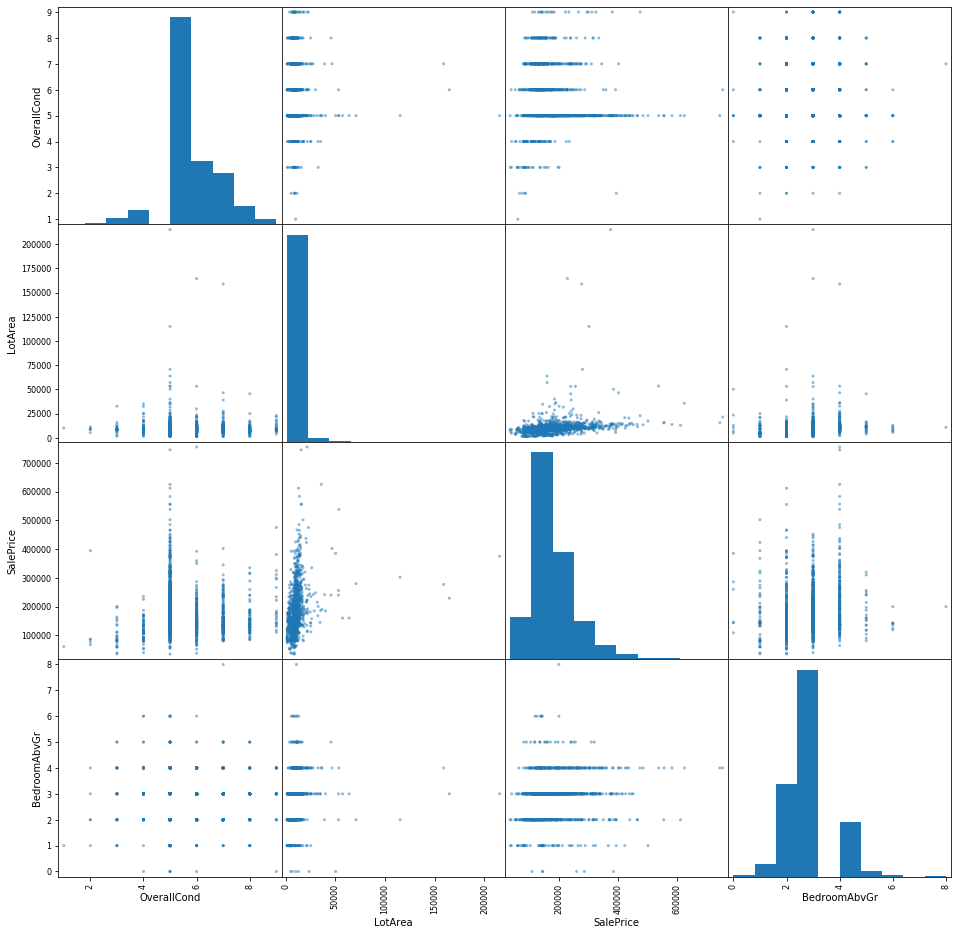

In [57]:
# Investigating Distributions using scatter_matrix

# print(df.columns)
pd.plotting.scatter_matrix(df[['OverallCond','LotArea','SalePrice','BedroomAbvGr']], figsize=(16,16));

[]

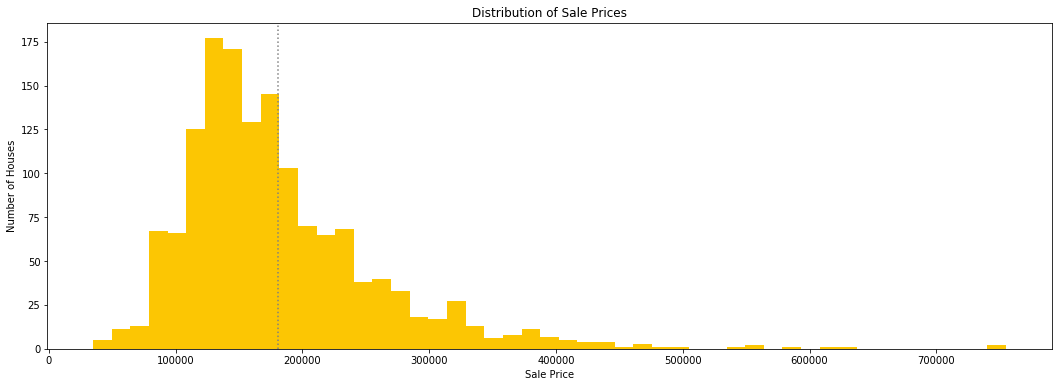

In [140]:
# Create a plot that shows the SalesPrice Distribution

# print(df.columns)
# SalePrices = df['SalePrice']
# SalePrices.plot.hist(bins=20, title='Distribution by Sale Price', figsize=(18,6))

fig, axs = plt.subplots(figsize=(18,6))
axs.hist(df['SalePrice'], bins='auto', color=('#fcc603'))
axs.set_title('Distribution of Sale Prices')
axs.set_xlabel('Sale Price')
axs.set_ylabel('Number of Houses')
axs.axvline(df['SalePrice'].mean(), color='Gray', linestyle=':')
axs.plot()

[]

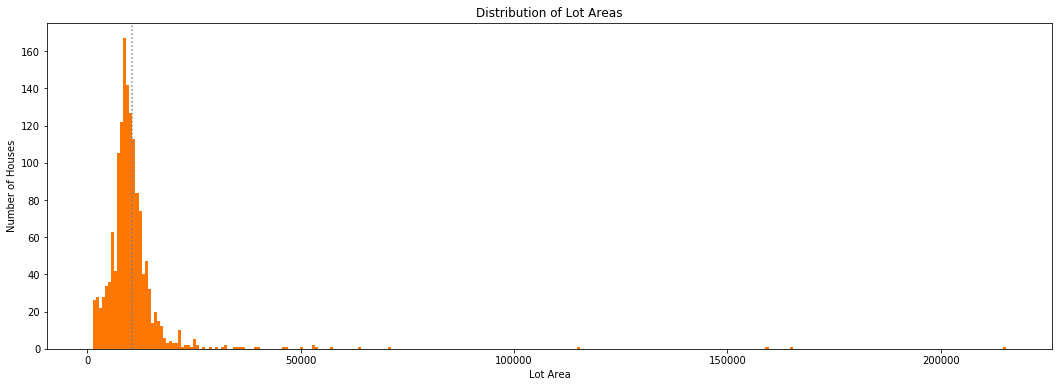

In [141]:
# Create a plot that shows the LotArea Distribution

# df['LotArea'].plot.hist(orientation='vertical', bins=20, figsize=(10,10))

fig, axs = plt.subplots(figsize=(18,6))
axs.hist(df['LotArea'], bins='auto', color=('#fc7703'))
axs.set_title('Distribution of Lot Areas')
axs.set_xlabel('Lot Area')
axs.set_ylabel('Number of Houses')
axs.axvline(df['LotArea'].mean(), color='Gray', linestyle=':')
axs.plot()

[]

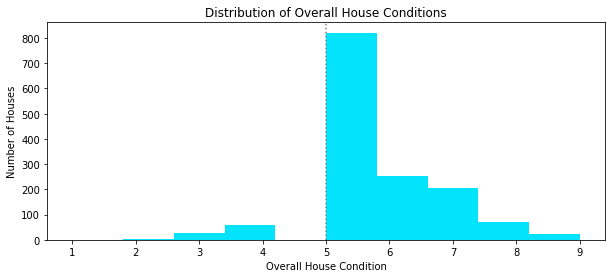

In [142]:
# Create a plot that shows the Distribution of the overall house condition

fig, axs = plt.subplots(figsize=(10,4))
axs.hist(df['OverallCond'], bins=10, color=('#03e3fc'))
axs.set_title('Distribution of Overall House Conditions')
axs.set_xlabel('Overall House Condition')
axs.set_ylabel('Number of Houses')
axs.axvline(df['OverallCond'].median(), color='Gray', linestyle=':')
axs.plot()

# Most houses have an overall condition that is above average, but the largest number of houses are in 'Average' condition.

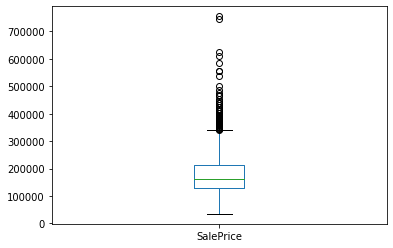

In [143]:
# Create a Box Plot for SalePrice

df['SalePrice'].plot.box()

[]

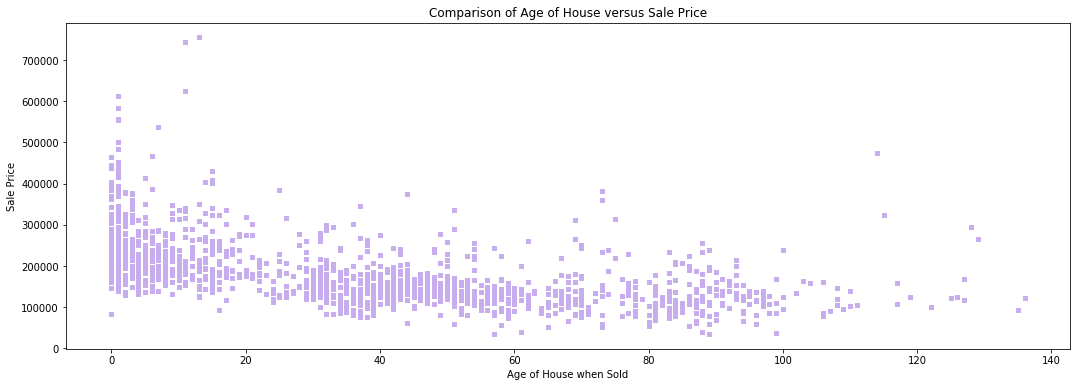

In [173]:
# Perform an Exploration of home values by age

# print(df.columns)

df['Age'] = df['YrSold'] - df['YearBuilt']
axs = df.plot.scatter('Age', 'SalePrice', marker="s", figsize=(18,6), color=('#c7aded'));
axs.set_title('Comparison of Age of House versus Sale Price')
axs.set_xlabel('Age of House when Sold')
axs.set_ylabel('Sale Price')
axs.plot()

# You can see from the scatterplot that, the greater the age of the house, the lower the Sale Price is.
# You can also see that there are very few houses over 100 years old.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!